# library import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns


# Load dataset

In [5]:
df = pd.read_csv('exoplanets2.csv')
# Display the first few rows 
df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,23-07-2014,2011-08,23-07-2014
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,14-05-2014,2008-01,14-05-2014
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,19-09-2023,2023-08,19-09-2023
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,04-09-2018,2017-03,06-09-2018
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,25-04-2018,2011-08,23-07-2014


In [6]:
df.shape

(36424, 92)

In [7]:
df.info # Information about the data

<bound method DataFrame.info of          pl_name hostname  default_flag  sy_snum  sy_pnum  discoverymethod  \
0       11 Com b   11 Com             0        2        1  Radial Velocity   
1       11 Com b   11 Com             0        2        1  Radial Velocity   
2       11 Com b   11 Com             1        2        1  Radial Velocity   
3       11 UMi b   11 UMi             1        1        1  Radial Velocity   
4       11 UMi b   11 UMi             0        1        1  Radial Velocity   
...          ...      ...           ...      ...      ...              ...   
36419  ups And d  ups And             0        2        3  Radial Velocity   
36420  ups Leo b  ups Leo             1        1        1  Radial Velocity   
36421   xi Aql b   xi Aql             0        1        1  Radial Velocity   
36422   xi Aql b   xi Aql             0        1        1  Radial Velocity   
36423   xi Aql b   xi Aql             1        1        1  Radial Velocity   

       disc_year               

In [8]:
df.describe()

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,36424.000000,36424.000000,36424.000000,36424.000000,36424.000000,3.326600e+04,3.172600e+04,3.172500e+04,33266.000000,20008.000000,...,34755.000000,35722.000000,35709.000000,35708.000000,35710.000000,35481.000000,35481.000000,35423.000000,35423.000000,35423.000000
mean,0.158302,1.086152,1.881864,2015.400697,0.001977,1.312447e+04,1.519305e+04,-3.578568e+03,-0.000240,5.016227,...,-36.756705,13.592333,0.117107,-0.117736,11.569429,0.036168,-0.035651,13.357780,0.000526,-0.000526
std,0.365029,0.310858,1.204266,3.891674,0.044417,2.205352e+06,2.638892e+06,5.627286e+05,0.020514,189.417747,...,173.087483,2.431927,0.151954,0.182827,2.335484,0.205936,0.197648,2.368076,0.001109,0.001109
min,0.000000,1.000000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,...,-2900.000000,0.872000,0.001000,-12.270000,-3.044000,0.011000,-11.140000,2.364310,0.000118,-0.063232
25%,0.000000,1.000000,1.000000,2014.000000,0.000000,4.361288e+00,8.000000e-06,-2.003000e-04,0.000000,0.054192,...,-21.340000,12.597000,0.046000,-0.137000,10.726000,0.020000,-0.034000,12.383300,0.000255,-0.000508
50%,0.000000,1.000000,1.000000,2016.000000,0.000000,1.034969e+01,3.824000e-05,-3.829000e-05,0.000000,0.100600,...,-7.774000,14.204000,0.092000,-0.092000,12.288000,0.024000,-0.024000,14.017800,0.000356,-0.000356
75%,0.000000,1.000000,2.000000,2016.000000,0.000000,2.667570e+01,2.003000e-04,-8.000000e-06,0.000000,0.219300,...,-2.188000,15.284000,0.137000,-0.046000,13.175000,0.034000,-0.020000,15.057100,0.000508,-0.000255
max,1.000000,4.000000,8.000000,2024.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,19000.000000,...,2700.000000,45.340000,11.000000,-0.001000,35.330000,9.995000,-0.011000,20.186100,0.063232,-0.000118


# data cleaning

In [10]:
df.isnull().sum() # total number of Null values

pl_name              0
hostname             0
default_flag         0
sy_snum              0
sy_pnum              0
                  ... 
sy_gaiamagerr1    1001
sy_gaiamagerr2    1001
rowupdate            1
pl_pubdate           0
releasedate          0
Length: 92, dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]*100 #percentage of the total null values

pl_name           0.000000
hostname          0.000000
default_flag      0.000000
sy_snum           0.000000
sy_pnum           0.000000
                    ...   
sy_gaiamagerr1    2.748188
sy_gaiamagerr2    2.748188
rowupdate         0.002745
pl_pubdate        0.000000
releasedate       0.000000
Length: 92, dtype: float64

In [12]:
df.isnull().sum().sum() # total number of Null values in whole data 

1035467

In [13]:
df.isnull().sum().sum()/(df.shape[0]*(df.shape[1]))*100 #percentage of Null values in whole data 

30.900164965288056

In [14]:
df.dropna(inplace = True) # remove null values

In [15]:
df.isnull().sum().sum()

0

In [16]:
df.duplicated().sum()

0

In [17]:
df.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

In [18]:
# find duplicate
duplicate = df[df.duplicated (subset = ['pl_name'], keep=False)]
print(duplicate.sum())

pl_name           HD 73583 bHD 73583 bHD 73583 cHD 73583 cLTT 37...
hostname           HD 73583HD 73583HD 73583HD 73583LTT 3780LTT 3780
default_flag                                                      2
sy_snum                                                           8
sy_pnum                                                          12
                                        ...                        
sy_gaiamagerr1                                             0.002874
sy_gaiamagerr2                                            -0.002874
rowupdate         16-03-202221-02-202421-02-202416-03-202203-08-...
pl_pubdate               2021-102023-012023-012021-102020-102020-07
releasedate       16-03-202221-02-202421-02-202416-03-202203-08-...
Length: 92, dtype: object


In [19]:
# remove duplicate
df.drop_duplicates(subset = ['pl_name'])

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
497,EPIC 249893012 b,EPIC 249893012,1,1,3,Transit,2020,K2,Published Confirmed,0,...,-0.022,9.714,0.023,-0.023,11.40190,0.000495,-0.000495,06-02-2020,2020-04,13-02-2020
498,EPIC 249893012 c,EPIC 249893012,1,1,3,Transit,2020,K2,Published Confirmed,0,...,-0.022,9.714,0.023,-0.023,11.40190,0.000495,-0.000495,06-02-2020,2020-04,13-02-2020
499,EPIC 249893012 d,EPIC 249893012,1,1,3,Transit,2020,K2,Published Confirmed,0,...,-0.022,9.714,0.023,-0.023,11.40190,0.000495,-0.000495,06-02-2020,2020-04,13-02-2020
642,GJ 367 b,GJ 367,1,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.044,5.780,0.020,-0.020,9.15159,0.000650,-0.000650,10-08-2023,2023-07,10-08-2023
1485,HATS-17 b,HATS-17,1,1,1,Transit,2016,HATSouth,Published Confirmed,0,...,-0.057,10.698,0.021,-0.021,12.21790,0.000249,-0.000249,14-09-2016,2016-04,15-09-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34724,TOI-836 b,TOI-836,1,1,2,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.030,6.804,0.018,-0.018,9.40475,0.000443,-0.000443,25-02-2023,2023-02,25-02-2023
34725,TOI-836 c,TOI-836,1,1,2,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.030,6.804,0.018,-0.018,9.40475,0.000443,-0.000443,25-02-2023,2023-02,25-02-2023
34757,TOI-908 b,TOI-908,1,1,1,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.012,9.637,0.021,-0.021,11.10610,0.000404,-0.000404,10-07-2023,2023-06,10-07-2023
35455,WASP-193 b,WASP-193,1,1,1,Transit,2023,WASP-South,Published Confirmed,0,...,-0.023,10.745,0.035,-0.035,12.04210,0.000261,-0.000261,26-07-2023,2023-07,26-07-2023


# add new columns of density 

In [21]:
earth_mass_kg = 5.972e24 # earth mass
earth_radius_m = 6.371e6 #earth radius
df['mass_kg'] = df['pl_bmasse'] * earth_mass_kg 
df['radius_m'] = df['pl_rade'] * earth_radius_m
df['volume_m3'] = (4/3)*np.pi*df['radius_m']**3
df['density'] = df['mass_kg']/df['volume_m3']
h1 = df.groupby(['pl_name','hostname','pl_radj','pl_orbper','pl_orbsmax','pl_rade','pl_bmasse','pl_eqt','st_teff','st_rad','sy_dist','pl_insol','density','st_met','pl_orbeccen','st_mass','ttv_flag','discoverymethod','releasedate']).size().reset_index(name='count')
h1

,pl_name,hostname,pl_radj,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_eqt,st_teff,st_rad,sy_dist,pl_insol,density,st_met,pl_orbeccen,st_mass,ttv_flag,discoverymethod,releasedate,count
0,EPIC 249893012 b,EPIC 249893012,0.174,3.595100,0.047000,1.950,8.75000,1616.0,5430.0,1.71,321.29600,1037.00,6505.978046,0.200,0.060,1.05,0,Transit,13-02-2020,1
1,EPIC 249893012 c,EPIC 249893012,0.327,15.624000,0.130000,3.670,14.67000,990.0,5430.0,1.71,321.29600,160.00,1636.214721,0.200,0.070,1.05,0,Transit,13-02-2020,1
2,EPIC 249893012 d,EPIC 249893012,0.352,35.747000,0.220000,3.940,10.18000,752.0,5430.0,1.71,321.29600,53.00,917.629754,0.200,0.150,1.05,0,Transit,13-02-2020,1
3,GJ 367 b,GJ 367,0.062,0.321923,0.007090,0.699,0.63300,1365.0,3522.0,0.46,9.41263,579.00,10218.344899,-0.010,0.060,0.46,0,Transit,10-08-2023,1
4,HATS-17 b,HATS-17,0.777,16.254611,0.130800,8.709,425.25654,814.0,5846.0,1.09,400.33100,72.70,3549.396398,0.300,0.029,1.13,0,Transit,15-09-2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,TOI-836 b,TOI-836,0.152,3.816730,0.042200,1.704,4.53000,871.0,4552.0,0.67,27.50240,78.84,5047.749625,-0.284,0.053,0.68,0,Transit,25-02-2023,1
89,TOI-836 c,TOI-836,0.231,8.595450,0.075000,2.587,9.60000,665.0,4552.0,0.67,27.50240,26.71,3056.963979,-0.284,0.078,0.68,1,Transit,25-02-2023,1
90,TOI-908 b,TOI-908,0.284,3.183792,0.041657,3.186,16.13700,1317.0,5626.0,1.03,175.74800,80.88,2751.020706,0.080,0.132,0.95,0,Transit,10-07-2023,1
91,WASP-193 b,WASP-193,1.464,6.246334,0.067600,16.410,44.17815,1254.0,6078.0,1.24,362.08700,413.00,55.117582,-0.060,0.056,1.06,0,Transit,26-07-2023,1


# TTV filtre 

In [23]:
h2 = h1[h1['ttv_flag']>0] # TTV means transist time variation it means Variation in time of a planet transit across its star
h2

,pl_name,hostname,pl_radj,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_eqt,st_teff,st_rad,sy_dist,pl_insol,density,st_met,pl_orbeccen,st_mass,ttv_flag,discoverymethod,releasedate,count
37,LP 791-18 d,LP 791-18,0.092,2.753436,0.01992,1.032,0.90000,396.0,2960.0,0.18,26.4927,5.83,4514.522190,-0.090,0.0015,0.14,1,Transit,14-05-2023,1
46,TOI-1130 b,TOI-1130,0.318,4.074450,0.04457,3.560,19.28000,632.0,4350.0,0.69,58.2609,78.10,2355.946425,0.300,0.0541,0.71,1,Transit,05-02-2024,1
47,TOI-1130 c,TOI-1130,1.188,8.350231,0.07191,13.320,325.69000,498.0,4350.0,0.69,58.2609,30.00,759.801461,0.300,0.0457,0.71,1,Transit,05-02-2024,1
53,TOI-1266 b,TOI-1266,0.211,10.894843,0.07360,2.370,13.50000,413.0,3600.0,0.42,36.0118,4.90,5591.098005,-0.500,0.0900,0.45,1,Transit,08-10-2020,1
54,TOI-1266 c,TOI-1266,0.139,18.801510,0.10580,1.560,2.20000,344.0,3600.0,0.42,36.0118,2.30,3194.899933,-0.500,0.0400,0.45,1,Transit,08-10-2020,1
64,TOI-2180 b,TOI-2180,1.010,260.790000,0.82800,11.321,875.61726,348.0,5695.0,1.64,116.6850,2.71,3327.118867,0.253,0.3683,1.11,1,Transit,10-01-2022,1
89,TOI-836 c,TOI-836,0.231,8.595450,0.07500,2.587,9.60000,665.0,4552.0,0.67,27.5024,26.71,3056.963979,-0.284,0.0780,0.68,1,Transit,25-02-2023,1


# hill radius

In [25]:
h2['hill_radius'] = h2.apply(lambda row: row['pl_orbsmax']*(row['pl_bmasse']/(3*row['st_mass']))**(1/3),axis = 1)
h2.drop(columns=['count','ttv_flag'],inplace=True,axis=0)
h2

C:\Users\swaya\AppData\Local\Temp\ipykernel_19616\1916432239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2['hill_radius'] = h2.apply(lambda row: row['pl_orbsmax']*(row['pl_bmasse']/(3*row['st_mass']))**(1/3),axis = 1)
C:\Users\swaya\AppData\Local\Temp\ipykernel_19616\1916432239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2.drop(columns=['count','ttv_flag'],inplace=True,axis=0)


,pl_name,hostname,pl_radj,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_eqt,st_teff,st_rad,sy_dist,pl_insol,density,st_met,pl_orbeccen,st_mass,discoverymethod,releasedate,hill_radius
37,LP 791-18 d,LP 791-18,0.092,2.753436,0.01992,1.032,0.90000,396.0,2960.0,0.18,26.4927,5.83,4514.522190,-0.090,0.0015,0.14,Transit,14-05-2023,0.025682
46,TOI-1130 b,TOI-1130,0.318,4.074450,0.04457,3.560,19.28000,632.0,4350.0,0.69,58.2609,78.10,2355.946425,0.300,0.0541,0.71,Transit,05-02-2024,0.092886
47,TOI-1130 c,TOI-1130,1.188,8.350231,0.07191,13.320,325.69000,498.0,4350.0,0.69,58.2609,30.00,759.801461,0.300,0.0457,0.71,Transit,05-02-2024,0.384531
53,TOI-1266 b,TOI-1266,0.211,10.894843,0.07360,2.370,13.50000,413.0,3600.0,0.42,36.0118,4.90,5591.098005,-0.500,0.0900,0.45,Transit,08-10-2020,0.158566
54,TOI-1266 c,TOI-1266,0.139,18.801510,0.10580,1.560,2.20000,344.0,3600.0,0.42,36.0118,2.30,3194.899933,-0.500,0.0400,0.45,Transit,08-10-2020,0.124504
64,TOI-2180 b,TOI-2180,1.010,260.790000,0.82800,11.321,875.61726,348.0,5695.0,1.64,116.6850,2.71,3327.118867,0.253,0.3683,1.11,Transit,10-01-2022,5.304613
89,TOI-836 c,TOI-836,0.231,8.595450,0.07500,2.587,9.60000,665.0,4552.0,0.67,27.5024,26.71,3056.963979,-0.284,0.0780,0.68,Transit,25-02-2023,0.125683


In [26]:
h2.columns = ['planetname','star','planet_radius(in jupiter radius)','planet_orbital_period2','orbital_semi_major_axis','planet_radius_earth','planet_mass_earth','planet_equilibrium_temp_k','stellar_effective_temp_k','stellar_radius_solar','distance_to_planetary_system','insolation_flux','density','stellar_metallicity','orbital_eccentricity','stellar_mass','discoverymethod','date','hill_radius']
drop = h2.drop_duplicates(subset = ['star']) # remove duplicate
h4 =drop 
h4

,planetname,star,planet_radius(in jupiter radius),planet_orbital_period2,orbital_semi_major_axis,planet_radius_earth,planet_mass_earth,planet_equilibrium_temp_k,stellar_effective_temp_k,stellar_radius_solar,distance_to_planetary_system,insolation_flux,density,stellar_metallicity,orbital_eccentricity,stellar_mass,discoverymethod,date,hill_radius
37,LP 791-18 d,LP 791-18,0.092,2.753436,0.01992,1.032,0.90000,396.0,2960.0,0.18,26.4927,5.83,4514.522190,-0.090,0.0015,0.14,Transit,14-05-2023,0.025682
46,TOI-1130 b,TOI-1130,0.318,4.074450,0.04457,3.560,19.28000,632.0,4350.0,0.69,58.2609,78.10,2355.946425,0.300,0.0541,0.71,Transit,05-02-2024,0.092886
53,TOI-1266 b,TOI-1266,0.211,10.894843,0.07360,2.370,13.50000,413.0,3600.0,0.42,36.0118,4.90,5591.098005,-0.500,0.0900,0.45,Transit,08-10-2020,0.158566
64,TOI-2180 b,TOI-2180,1.010,260.790000,0.82800,11.321,875.61726,348.0,5695.0,1.64,116.6850,2.71,3327.118867,0.253,0.3683,1.11,Transit,10-01-2022,5.304613
89,TOI-836 c,TOI-836,0.231,8.595450,0.07500,2.587,9.60000,665.0,4552.0,0.67,27.5024,26.71,3056.963979,-0.284,0.0780,0.68,Transit,25-02-2023,0.125683


# convert hill radius in km

In [28]:
h4['moon_names'] = ['1','1','1','1','1']
h3=h4
h3['hill radius in km'] = h3['hill_radius']*149597870.7
drop=h3
drop

C:\Users\swaya\AppData\Local\Temp\ipykernel_19616\516921407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h4['moon_names'] = ['1','1','1','1','1']
C:\Users\swaya\AppData\Local\Temp\ipykernel_19616\516921407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3['hill radius in km'] = h3['hill_radius']*149597870.7


,planetname,star,planet_radius(in jupiter radius),planet_orbital_period2,orbital_semi_major_axis,planet_radius_earth,planet_mass_earth,planet_equilibrium_temp_k,stellar_effective_temp_k,stellar_radius_solar,...,insolation_flux,density,stellar_metallicity,orbital_eccentricity,stellar_mass,discoverymethod,date,hill_radius,moon_names,hill radius in km
37,LP 791-18 d,LP 791-18,0.092,2.753436,0.01992,1.032,0.90000,396.0,2960.0,0.18,...,5.83,4514.522190,-0.090,0.0015,0.14,Transit,14-05-2023,0.025682,1,3.841898e+06
46,TOI-1130 b,TOI-1130,0.318,4.074450,0.04457,3.560,19.28000,632.0,4350.0,0.69,...,78.10,2355.946425,0.300,0.0541,0.71,Transit,05-02-2024,0.092886,1,1.389560e+07
53,TOI-1266 b,TOI-1266,0.211,10.894843,0.07360,2.370,13.50000,413.0,3600.0,0.42,...,4.90,5591.098005,-0.500,0.0900,0.45,Transit,08-10-2020,0.158566,1,2.372119e+07
64,TOI-2180 b,TOI-2180,1.010,260.790000,0.82800,11.321,875.61726,348.0,5695.0,1.64,...,2.71,3327.118867,0.253,0.3683,1.11,Transit,10-01-2022,5.304613,1,7.935588e+08
89,TOI-836 c,TOI-836,0.231,8.595450,0.07500,2.587,9.60000,665.0,4552.0,0.67,...,26.71,3056.963979,-0.284,0.0780,0.68,Transit,25-02-2023,0.125683,1,1.880184e+07


# stable radius

In [30]:
drop['hill radius in km'] = (drop['hill_radius']*149597870.7) #km
drop['stable radius'] = drop['hill radius in km']/3 # stable radius in kilometre
drop

C:\Users\swaya\AppData\Local\Temp\ipykernel_19616\1892010874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop['hill radius in km'] = (drop['hill_radius']*149597870.7) #km
C:\Users\swaya\AppData\Local\Temp\ipykernel_19616\1892010874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop['stable radius'] = drop['hill radius in km']/3 # stable radius in kilometre


,planetname,star,planet_radius(in jupiter radius),planet_orbital_period2,orbital_semi_major_axis,planet_radius_earth,planet_mass_earth,planet_equilibrium_temp_k,stellar_effective_temp_k,stellar_radius_solar,...,density,stellar_metallicity,orbital_eccentricity,stellar_mass,discoverymethod,date,hill_radius,moon_names,hill radius in km,stable radius
37,LP 791-18 d,LP 791-18,0.092,2.753436,0.01992,1.032,0.90000,396.0,2960.0,0.18,...,4514.522190,-0.090,0.0015,0.14,Transit,14-05-2023,0.025682,1,3.841898e+06,1.280633e+06
46,TOI-1130 b,TOI-1130,0.318,4.074450,0.04457,3.560,19.28000,632.0,4350.0,0.69,...,2355.946425,0.300,0.0541,0.71,Transit,05-02-2024,0.092886,1,1.389560e+07,4.631865e+06
53,TOI-1266 b,TOI-1266,0.211,10.894843,0.07360,2.370,13.50000,413.0,3600.0,0.42,...,5591.098005,-0.500,0.0900,0.45,Transit,08-10-2020,0.158566,1,2.372119e+07,7.907065e+06
64,TOI-2180 b,TOI-2180,1.010,260.790000,0.82800,11.321,875.61726,348.0,5695.0,1.64,...,3327.118867,0.253,0.3683,1.11,Transit,10-01-2022,5.304613,1,7.935588e+08,2.645196e+08
89,TOI-836 c,TOI-836,0.231,8.595450,0.07500,2.587,9.60000,665.0,4552.0,0.67,...,3056.963979,-0.284,0.0780,0.68,Transit,25-02-2023,0.125683,1,1.880184e+07,6.267280e+06


# roche limit

In [32]:
# roche limt m
df= drop
def roche(planet_radius_earth,density):
    return planet_radius_earth * (2*(density/0.5))**(1/3)

df['roche limit'] = df.apply(lambda row: roche(row['planet_radius_earth'],row['density']),axis = 1)
df

C:\Users\swaya\AppData\Local\Temp\ipykernel_19616\3734581039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roche limit'] = df.apply(lambda row: roche(row['planet_radius_earth'],row['density']),axis = 1)


,planetname,star,planet_radius(in jupiter radius),planet_orbital_period2,orbital_semi_major_axis,planet_radius_earth,planet_mass_earth,planet_equilibrium_temp_k,stellar_effective_temp_k,stellar_radius_solar,...,stellar_metallicity,orbital_eccentricity,stellar_mass,discoverymethod,date,hill_radius,moon_names,hill radius in km,stable radius,roche limit
37,LP 791-18 d,LP 791-18,0.092,2.753436,0.01992,1.032,0.90000,396.0,2960.0,0.18,...,-0.090,0.0015,0.14,Transit,14-05-2023,0.025682,1,3.841898e+06,1.280633e+06,27.075114
46,TOI-1130 b,TOI-1130,0.318,4.074450,0.04457,3.560,19.28000,632.0,4350.0,0.69,...,0.300,0.0541,0.71,Transit,05-02-2024,0.092886,1,1.389560e+07,4.631865e+06,75.195491
53,TOI-1266 b,TOI-1266,0.211,10.894843,0.07360,2.370,13.50000,413.0,3600.0,0.42,...,-0.500,0.0900,0.45,Transit,08-10-2020,0.158566,1,2.372119e+07,7.907065e+06,66.772973
64,TOI-2180 b,TOI-2180,1.010,260.790000,0.82800,11.321,875.61726,348.0,5695.0,1.64,...,0.253,0.3683,1.11,Transit,10-01-2022,5.304613,1,7.935588e+08,2.645196e+08,268.283662
89,TOI-836 c,TOI-836,0.231,8.595450,0.07500,2.587,9.60000,665.0,4552.0,0.67,...,-0.284,0.0780,0.68,Transit,25-02-2023,0.125683,1,1.880184e+07,6.267280e+06,59.600037


# moon habitability zone formula purposed

In [34]:
def moon_habitable_zone(df):
    return df['stable radius']-df['roche limit']
df['moon_possiblity_zone'] = df.apply(moon_habitable_zone,axis = 1) # if moon diameter is smaller than moon possiblity zone then moon is stable
df

C:\Users\swaya\AppData\Local\Temp\ipykernel_19616\1909557085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['moon_possiblity_zone'] = df.apply(moon_habitable_zone,axis = 1)


,planetname,star,planet_radius(in jupiter radius),planet_orbital_period2,orbital_semi_major_axis,planet_radius_earth,planet_mass_earth,planet_equilibrium_temp_k,stellar_effective_temp_k,stellar_radius_solar,...,orbital_eccentricity,stellar_mass,discoverymethod,date,hill_radius,moon_names,hill radius in km,stable radius,roche limit,moon_possiblity_zone
37,LP 791-18 d,LP 791-18,0.092,2.753436,0.01992,1.032,0.90000,396.0,2960.0,0.18,...,0.0015,0.14,Transit,14-05-2023,0.025682,1,3.841898e+06,1.280633e+06,27.075114,1.280606e+06
46,TOI-1130 b,TOI-1130,0.318,4.074450,0.04457,3.560,19.28000,632.0,4350.0,0.69,...,0.0541,0.71,Transit,05-02-2024,0.092886,1,1.389560e+07,4.631865e+06,75.195491,4.631790e+06
53,TOI-1266 b,TOI-1266,0.211,10.894843,0.07360,2.370,13.50000,413.0,3600.0,0.42,...,0.0900,0.45,Transit,08-10-2020,0.158566,1,2.372119e+07,7.907065e+06,66.772973,7.906998e+06
64,TOI-2180 b,TOI-2180,1.010,260.790000,0.82800,11.321,875.61726,348.0,5695.0,1.64,...,0.3683,1.11,Transit,10-01-2022,5.304613,1,7.935588e+08,2.645196e+08,268.283662,2.645193e+08
89,TOI-836 c,TOI-836,0.231,8.595450,0.07500,2.587,9.60000,665.0,4552.0,0.67,...,0.0780,0.68,Transit,25-02-2023,0.125683,1,1.880184e+07,6.267280e+06,59.600037,6.267221e+06


# formula testing

In [36]:
# Planet data
planet_data = {
    'Planet': ['Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
    'stable radius': [6371, 3389, 69911, 58232, 25362, 24622],  # Average radii in km
    'roche limit': [384400, 94700, 266000, 378000, 190000, 195000],  # Approximate Roche limits
    'Moon Diameter (km)': [3474.8, 3534.8, 3474, 5262, 315, 330]  # Diameters of notable moons (e.g., Earth's moon)
}

# Create DataFrame
solarsystem = pd.DataFrame(planet_data)

# Function to calculate moon habitable zone
def moon_habitable_zone(row):
    return abs(row['stable radius'] - row['roche limit'])

# Add moon possibility zone
solarsystem['moon_possiblity_zone'] = solarsystem.apply(moon_habitable_zone, axis=1)

# Check if moon is possible
solarsystem['moon_possible'] = solarsystem['moon_possiblity_zone'].apply(
    lambda x: 'possible' if x > solarsystem.loc[solarsystem.index[solarsystem['moon_possiblity_zone'] == x][0], 'Moon Diameter (km)'] else 'not possible'
)
solarsystem


,Planet,stable radius,roche limit,Moon Diameter (km),moon_possiblity_zone,moon_possible
0,Earth,6371,384400,3474.8,378029,possible
1,Mars,3389,94700,3534.8,91311,possible
2,Jupiter,69911,266000,3474.0,196089,possible
3,Saturn,58232,378000,5262.0,319768,possible
4,Uranus,25362,190000,315.0,164638,possible
5,Neptune,24622,195000,330.0,170378,possible


#     Estimate the maximum size of a moon that a planet can hold at the Roche limit.


In [38]:
def max_moon_size(rochelimit):
    """
    Estimate the maximum size of a moon that a planet can hold at the Roche limit.
    Returns:
    The maximum diameter of the moon in meters.
    """
    # Estimate the maximum moon mass at Roche limit
    # For simplicity, let's assume a small moon with density comparable to the planet's density.
    moon_mass = 4/3 * math.pi * (rochelimit**3) * 0.5  # mass = (4/3 * pi * radius^3 * density)
    
    # Estimate the volume of the moon based on its mass and density
    moon_volume = moon_mass / 0.5
    
    # Calculate the moon's diameter from its volume (volume = 4/3 * pi * r^3)
    moon_diameter = (3 * moon_volume / (4 * math.pi))**(1/3) * 2
    
    return moon_diameter


# Apply the `max_moon_size` function to the 'roche limit' column and create a new 'max_diameter' column
df['moon_diameters'] = df['roche limit'].apply(max_moon_size)

copy = df.copy()
df

C:\Users\swaya\AppData\Local\Temp\ipykernel_19616\4022073174.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['moon_diameters'] = df['roche limit'].apply(max_moon_size)


,planetname,star,planet_radius(in jupiter radius),planet_orbital_period2,orbital_semi_major_axis,planet_radius_earth,planet_mass_earth,planet_equilibrium_temp_k,stellar_effective_temp_k,stellar_radius_solar,...,stellar_mass,discoverymethod,date,hill_radius,moon_names,hill radius in km,stable radius,roche limit,moon_possiblity_zone,moon_diameters
37,LP 791-18 d,LP 791-18,0.092,2.753436,0.01992,1.032,0.90000,396.0,2960.0,0.18,...,0.14,Transit,14-05-2023,0.025682,1,3.841898e+06,1.280633e+06,27.075114,1.280606e+06,54.150228
46,TOI-1130 b,TOI-1130,0.318,4.074450,0.04457,3.560,19.28000,632.0,4350.0,0.69,...,0.71,Transit,05-02-2024,0.092886,1,1.389560e+07,4.631865e+06,75.195491,4.631790e+06,150.390982
53,TOI-1266 b,TOI-1266,0.211,10.894843,0.07360,2.370,13.50000,413.0,3600.0,0.42,...,0.45,Transit,08-10-2020,0.158566,1,2.372119e+07,7.907065e+06,66.772973,7.906998e+06,133.545945
64,TOI-2180 b,TOI-2180,1.010,260.790000,0.82800,11.321,875.61726,348.0,5695.0,1.64,...,1.11,Transit,10-01-2022,5.304613,1,7.935588e+08,2.645196e+08,268.283662,2.645193e+08,536.567325
89,TOI-836 c,TOI-836,0.231,8.595450,0.07500,2.587,9.60000,665.0,4552.0,0.67,...,0.68,Transit,25-02-2023,0.125683,1,1.880184e+07,6.267280e+06,59.600037,6.267221e+06,119.200075


In [39]:
import pandas as pd

# Solar system data (example)
solar_system_data = {
    'planetname': ['Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
    'planet_radius(in jupiter radius)': [0.099, 0.053, 1.0, 0.95, 0.4, 0.38],
    'planet_radius_earth': [1.0, 0.532, 11.21, 9.45, 4.0, 3.88],  # Radius relative to Earth
    'planet_mass_earth': [1.0, 0.107, 317.8, 95.2, 14.5, 17.1],  # Mass relative to Earth
    'orbital_semi_major_axis': [1.0, 1.524, 5.203, 9.582, 19.191, 30.07],  # AU
    'orbital_eccentricity': [0.017, 0.093, 0.049, 0.056, 0.046, 0.010],
    'stellar_effective_temp_k': [5778, 5778, 5778, 5778, 5778, 5778],  # Sun's temperature
    'stellar_radius_solar': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],  # Relative to Sun's radius
    'distance_to_planetary_system': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  # Placeholder for simplicity
    'insolation_flux': [1.0, 0.38, 0.014, 0.003, 0.0004, 0.0001],  # Relative insolation flux
    'density': [5.514, 3.933, 1.326, 0.687, 1.300, 1.638],  # g/cm^3
    'stellar_metallicity': [0.02, 0.02, 0.02, 0.02, 0.02, 0.02],  # Assuming constant for simplicity
    'hill_radius': [0.263, 0.141, 4.617, 3.831, 1.489, 1.464],  # Hill Radius in AU
    'moon_names': [1, 2, 79, 82, 27, 14],  # Number of moons
    'hill radius in km': [0.263 * 149597870.7, 0.141 * 149597870.7,
                          4.617 * 149597870.7, 3.831 * 149597870.7, 1.489 * 149597870.7, 1.464 * 149597870.7],  # In km
    'stable_radius': [1.0, 1.529, 5.557, 10.339, 19.55, 30.19],  # Example stable radius values in AU
    'roche_limit': [0.057, 0.029, 0.242, 0.21, 0.085, 0.084],  # Roche limit in Earth radii
    'moon_habitable_zone': [1, 0, 0, 0, 0, 0],  # Whether moons are in habitable zone (example)
    'moon_diameters': [2, 1, 79, 82, 27, 14]  # Diameters of moons (in km)
}

# Creating a DataFrame for the Solar System
solar_system_df = pd.DataFrame(solar_system_data)

# Assuming 'df' is another DataFrame to be merged
# Merging solar_system_df with another DataFrame df (make sure df is defined)
merged_data = pd.concat([df, solar_system_df], ignore_index=True)

# Removing rows where planet is Jupiter or Neptune
merged_data = merged_data[~merged_data['planetname'].isin(['Jupiter', 'Neptune'])]

# Display the updated dataframe
merged_data


,planetname,star,planet_radius(in jupiter radius),planet_orbital_period2,orbital_semi_major_axis,planet_radius_earth,planet_mass_earth,planet_equilibrium_temp_k,stellar_effective_temp_k,stellar_radius_solar,...,hill_radius,moon_names,hill radius in km,stable radius,roche limit,moon_possiblity_zone,moon_diameters,stable_radius,roche_limit,moon_habitable_zone
0,LP 791-18 d,LP 791-18,0.092,2.753436,0.01992,1.032,0.90000,396.0,2960.0,0.18,...,0.025682,1,3.841898e+06,1.280633e+06,27.075114,1.280606e+06,54.150228,NaN,NaN,NaN
1,TOI-1130 b,TOI-1130,0.318,4.074450,0.04457,3.560,19.28000,632.0,4350.0,0.69,...,0.092886,1,1.389560e+07,4.631865e+06,75.195491,4.631790e+06,150.390982,NaN,NaN,NaN
2,TOI-1266 b,TOI-1266,0.211,10.894843,0.07360,2.370,13.50000,413.0,3600.0,0.42,...,0.158566,1,2.372119e+07,7.907065e+06,66.772973,7.906998e+06,133.545945,NaN,NaN,NaN
3,TOI-2180 b,TOI-2180,1.010,260.790000,0.82800,11.321,875.61726,348.0,5695.0,1.64,...,5.304613,1,7.935588e+08,2.645196e+08,268.283662,2.645193e+08,536.567325,NaN,NaN,NaN
4,TOI-836 c,TOI-836,0.231,8.595450,0.07500,2.587,9.60000,665.0,4552.0,0.67,...,0.125683,1,1.880184e+07,6.267280e+06,59.600037,6.267221e+06,119.200075,NaN,NaN,NaN
5,Earth,NaN,0.099,NaN,1.00000,1.000,1.00000,NaN,5778.0,1.00,...,0.263000,1,3.934424e+07,NaN,NaN,NaN,2.000000,1.000,0.057,1.0
6,Mars,NaN,0.053,NaN,1.52400,0.532,0.10700,NaN,5778.0,1.00,...,0.141000,2,2.109330e+07,NaN,NaN,NaN,1.000000,1.529,0.029,0.0
8,Saturn,NaN,0.950,NaN,9.58200,9.450,95.20000,NaN,5778.0,1.00,...,3.831000,82,5.731094e+08,NaN,NaN,NaN,82.000000,10.339,0.210,0.0
9,Uranus,NaN,0.400,NaN,19.19100,4.000,14.50000,NaN,5778.0,1.00,...,1.489000,27,2.227512e+08,NaN,NaN,NaN,27.000000,19.550,0.085,0.0


# REMOVE OUTLIER

In [41]:
df = df[(df['planet_radius_earth'] < 5.0) & (df['planet_mass_earth'] < 100.0)]
df

,planetname,star,planet_radius(in jupiter radius),planet_orbital_period2,orbital_semi_major_axis,planet_radius_earth,planet_mass_earth,planet_equilibrium_temp_k,stellar_effective_temp_k,stellar_radius_solar,...,stellar_mass,discoverymethod,date,hill_radius,moon_names,hill radius in km,stable radius,roche limit,moon_possiblity_zone,moon_diameters
37,LP 791-18 d,LP 791-18,0.092,2.753436,0.01992,1.032,0.90,396.0,2960.0,0.18,...,0.14,Transit,14-05-2023,0.025682,1,3.841898e+06,1.280633e+06,27.075114,1.280606e+06,54.150228
46,TOI-1130 b,TOI-1130,0.318,4.074450,0.04457,3.560,19.28,632.0,4350.0,0.69,...,0.71,Transit,05-02-2024,0.092886,1,1.389560e+07,4.631865e+06,75.195491,4.631790e+06,150.390982
53,TOI-1266 b,TOI-1266,0.211,10.894843,0.07360,2.370,13.50,413.0,3600.0,0.42,...,0.45,Transit,08-10-2020,0.158566,1,2.372119e+07,7.907065e+06,66.772973,7.906998e+06,133.545945
89,TOI-836 c,TOI-836,0.231,8.595450,0.07500,2.587,9.60,665.0,4552.0,0.67,...,0.68,Transit,25-02-2023,0.125683,1,1.880184e+07,6.267280e+06,59.600037,6.267221e+06,119.200075


# machine learning 

Confusion Matrix:
Predicted  0  1
Actual         
1          1  2


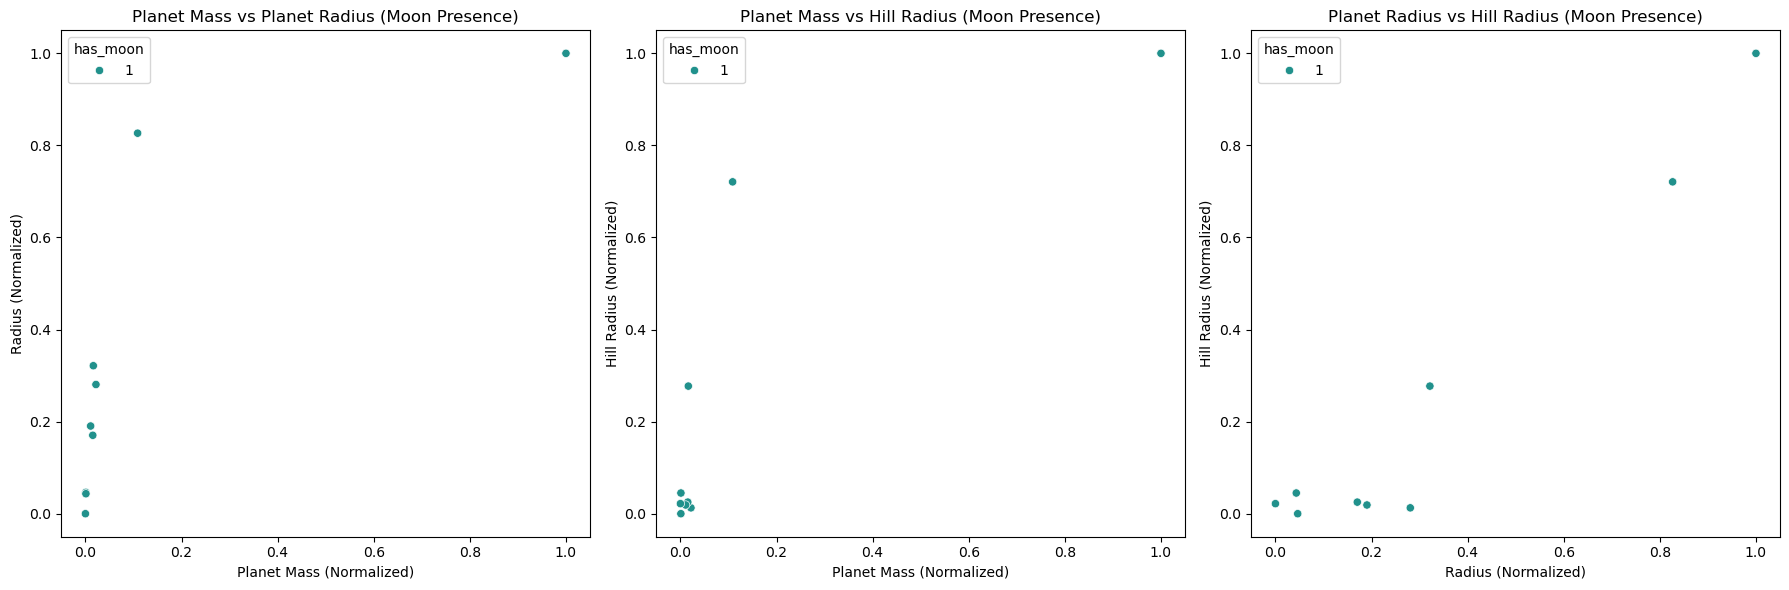

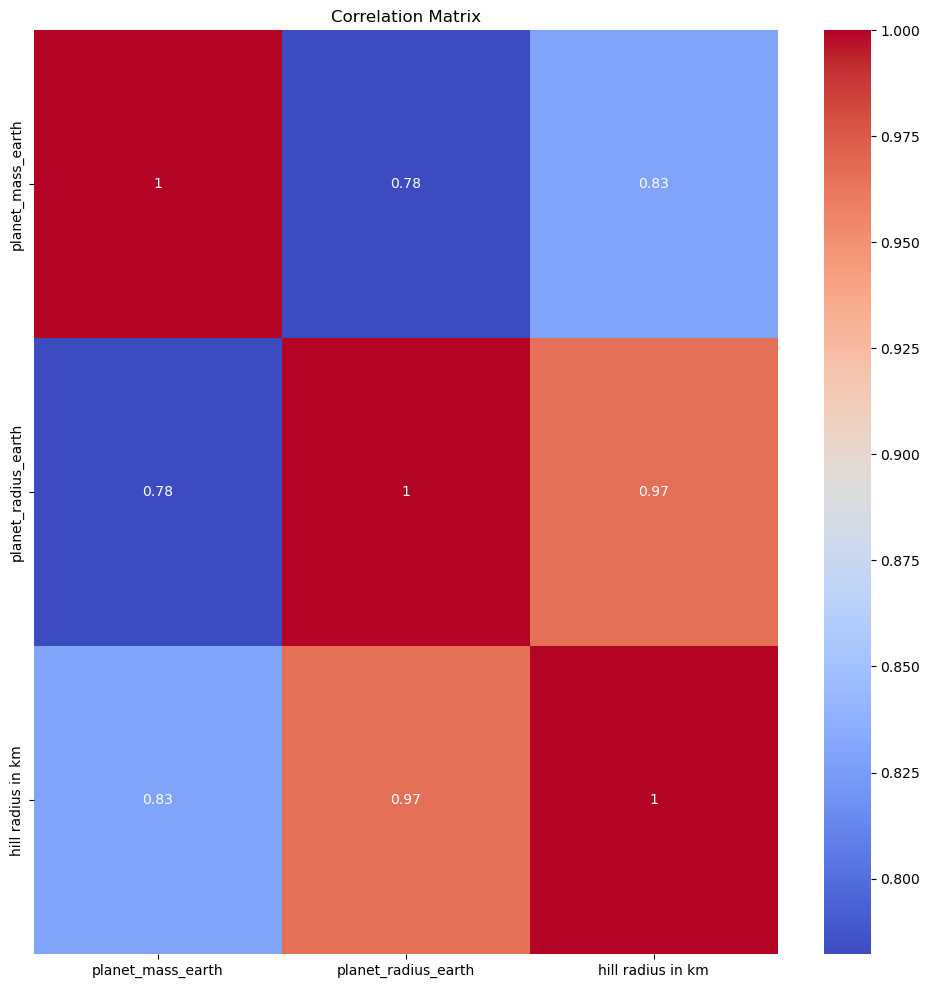

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize numerical features function
def normalize_feature(column):
    return (column - column.min()) / (column.max() - column.min())

# Define the SimpleDecisionTree class
class SimpleDecisionTree:
    def __init__(self):
        self.thresholds = {}
    
    def fit(self, X, y):
        for col in X.columns:
            self.thresholds[col] = X[col].mean()
    
    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            # If more than half the features are greater than their threshold, predict 1
            prediction = 1 if sum(row[col] > self.thresholds[col] for col in X.columns) > len(X.columns) / 2 else 0
            predictions.append(prediction)
        return np.array(predictions)

# Load and prepare data
# Ensure `merged_data` contains relevant planetary data and moon indicators
merged_data['planet_mass_earth'] = normalize_feature(merged_data['planet_mass_earth'])
merged_data['planet_radius_earth'] = normalize_feature(merged_data['planet_radius_earth'])
merged_data['hill radius in km'] = normalize_feature(merged_data['hill radius in km'])

# Create a binary target for moon presence
merged_data['has_moon'] = (merged_data['moon_names'] != 'None').astype(int)

# Define features and target
features = merged_data[['planet_mass_earth', 'planet_radius_earth', 'hill radius in km']]
target = merged_data['has_moon']

# Train-test split
train_size = int(0.7 * len(merged_data))
X_train, X_test = features[:train_size], features[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

# Train the model
model = SimpleDecisionTree()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:")
print(confusion_matrix)

# Scatter plot for analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Planet Mass vs Planet Radius
sns.scatterplot(ax=axes[0], x=merged_data['planet_mass_earth'], y=merged_data['planet_radius_earth'], hue=merged_data['has_moon'], palette='viridis')
axes[0].set_title('Planet Mass vs Planet Radius (Moon Presence)')
axes[0].set_xlabel('Planet Mass (Normalized)')
axes[0].set_ylabel('Radius (Normalized)')

# Scatter plot for Planet Mass vs Hill Radius
sns.scatterplot(ax=axes[1], x=merged_data['planet_mass_earth'], y=merged_data['hill radius in km'], hue=merged_data['has_moon'], palette='viridis')
axes[1].set_title('Planet Mass vs Hill Radius (Moon Presence)')
axes[1].set_xlabel('Planet Mass (Normalized)')
axes[1].set_ylabel('Hill Radius (Normalized)')

# Scatter plot for planet Radius vs Hill Radius
sns.scatterplot(ax=axes[2], x=merged_data['planet_radius_earth'], y=merged_data['hill radius in km'], hue=merged_data['has_moon'], palette='viridis')
axes[2].set_title('Planet Radius vs Hill Radius (Moon Presence)')
axes[2].set_xlabel('Radius (Normalized)')
axes[2].set_ylabel('Hill Radius (Normalized)')

plt.tight_layout()
plt.show()

# Correlation Matrix for Feature Analysis
plt.figure(figsize=(12, 12))  # Adjusting figure size for heatmap
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Explanation of the Confusion Matrix

From your confusion matrix:

Confusion Matrix:
Predicted  0     1
Actual       
1          1     2

This represents a binary classification where the goal is to predict whether a moon is present (1) or not (0). Let's break it down:

True Positive (TP): When the model predicts the moon is present (1), and it is indeed present.
In your case: TP = 2 (the number of times the model correctly predicted the moon is present).

True Negative (TN): When the model predicts the moon is not present (0), and it is indeed not present.
In your case: TN = 1 (the number of times the model correctly predicted the moon is not present).

False Positive (FP): When the model predicts the moon is present (1), but it is actually not present.
In your case: FP = 0 (the model didn't mistakenly predict the moon as present when it's not).

False Negative (FN): When the model predicts the moon is not present (0), but it is actually present.
In your case: FN = 1 (the model missed predicting the moon as present when it should have).


Meaning of the Results

The model predicted that the moon is present (1) 2 times, of which 2 times it was correct (True Positive).

The model predicted that the moon is not present (0) 1 time, of which 1 time it was correct (True Negative).

The model made 1 mistake where it failed to predict the moon's presence when it was actually present (False Negative).


Performance Metrics

Now, let's calculate the accuracy, precision, and F1-score using the following formulas:

1. Accuracy

Accuracy is the proportion of correct predictions (both True Positives and True Negatives) out of all predictions.

\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}

Using the values:

TP = 2

TN = 1

FP = 0

FN = 1


\text{Accuracy} = \frac{2 + 1}{2 + 1 + 0 + 1} = \frac{3}{4} = 0.75 \, \text{or} \, 75\%

2. Precision

Precision is the proportion of True Positives out of all instances where the model predicted the moon is present (i.e., the model predicted 1).

\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}

Using the values:

TP = 2

FP = 0


\text{Precision} = \frac{2}{2 + 0} = \frac{2}{2} = 1.0 \, \text{or} \, 100\%

3. F1-Score

The F1-score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall.

\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}

First, we need to calculate Recall (also called Sensitivity), which is the proportion of True Positives out of all actual positives:

\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}

Using the values:

TP = 2

FN = 1


\text{Recall} = \frac{2}{2 + 1} = \frac{2}{3} = 0.67 \, \text{or} \, 67\%

Now, calculate the F1-Score:

\text{F1-Score} = 2 \times \frac{1.0 \times 0.67}{1.0 + 0.67} = 2 \times \frac{0.67}{1.67} = \frac{1.34}{1.67} \approx 0.80 \, \text{or} \, 80\%

Summary of Metrics:

Accuracy: 75%

Precision: 100%

Recall: 67%

F1-Score: 80%


Which Planet Is the Moon Around?

To determine which planet the moon might be around, you'll need to examine the context of your dataset. If you have the planet_name or similar column in the data, you can analyze the relationship between the number of moons (moon_names) and the planet characteristics. For example, if your model predicts that a planet has moons (moon_names = 1), you would check the planet_name or planet_mass_earth columns in the data for which planet this prediction corresponds to.

If you have further questions or need help identifying which planets correspond to moon predictions, feel free to share more context! the presence of moons around planets.

In [45]:
print('performance of model')
Accuracy = (2+1)/(2+1+0+1)
print('Accuracy:',Accuracy)
precision = 2/(2+0)
print('precision:',precision)
recall = 2/(2+1)
print('Recall:',recall)
f1_score = 2*(precision*recall)/(precision+recall)
print('F1-score:',f1_score)

performance of model
Accuracy: 0.75
precision: 1.0
Recall: 0.6666666666666666
F1-score: 0.8


In [46]:
# Ensure the y_test and y_pred are aligned with the DataFrame
predicted_moons = merged_data.iloc[:len(y_pred)][y_pred == 1]

# Display the planets predicted to have moons
predicted_moons[['planetname', 'moon_names']]


,planetname,moon_names
1,TOI-1130 b,1
2,TOI-1266 b,1


# Conclusion - According to machine learning (simple decision tree) model planet TOI-1130 b and TOI-1266 b have possibility of Moon existence.

# conclusion - the moon exist around its planets according to the mathematical equation,this analysis does not prove the existence of moon it is just an hypothetical existence of moon around these two exoplanets.